In [1]:
import os
import pandas as pd
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.chdir("..")
PATH = os.getcwd()

## Import Data

In [5]:
from src.data.obtain import get_raw_data
df = get_raw_data()

## Scrub Data

In [6]:
# fix column names
df.columns = \
(pd.Series(df.columns)
 .map(lambda i: i.lower().translate(None, './()& '))
)

In [7]:
# rename columns
df.rename(columns={'siblingsspousesaboard': 'sibsp'}, inplace=True)

In [8]:
# missing data flags
df['age__is_null'] = df['age'].isnull().map(int)
df['cabinnumber__is_null'] = df['cabinnumber'].isnull().map(int)

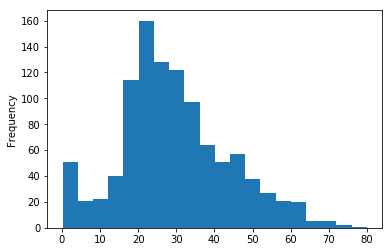

In [9]:
# impute missings
df['age'].plot.hist(bins=20);

In [10]:
df['age'].fillna(value=df['age'].median(), inplace=True)

In [11]:
# create gender column
df.loc[:, 'gender'] = df['name'].map(lambda i: 1 if 'Miss' in i or 'Mrs' in i else 0)

In [12]:
# create dummies
df = df.join(pd.get_dummies(df['embarked'], prefix='embarked'))

In [13]:
df = df.join(pd.get_dummies(df['passengerclass'], prefix='pclass'))

In [14]:
# drop columns
df.drop(['cabinnumber', 'ticket', 'name', 'embarked', 'passengerclass'], axis=1, inplace=True)

In [15]:
# convert to numeric types
df = df.apply(lambda c: pd.to_numeric(c, downcast='integer'))

## Backup

In [ ]:
df.to_csv("data/04-processed/titanic.csv")